In [12]:
import pandas as pd
import numpy
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('dataset/amazon_cells_labelled.txt', header=None, delimiter='\t')
df.columns = ['review', 'sentiment']
df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [14]:
def clean_text(df):
    all_reviews = list()
    lines = df['review'].values.tolist()
    for text in lines:
        
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        
        tokens = word_tokenize(text)
        
        table = str.maketrans('', '', '\t')
        stripped = [w.translate(table) for w in tokens]
        word = [word for word in stripped if word.isalpha()]
        
        stop_words = set(stopwords.words('english'))
        words = [w for w in word if not w in stop_words]
        
        ps = PorterStemmer()
        words = [ps.stem(w) for w in words]
        all_reviews.append(" ".join(words))
    return all_reviews


all_reviews = clean_text(df)
all_reviews[:20]

['way plug us unless go convert',
 'good case excel valu',
 'great jawbon',
 'tie charger convers last minutesmajor problem',
 'mic great',
 'jiggl plug get line right get decent volum',
 'sever dozen sever hundr contact imagin fun send one one',
 'razr ownery must',
 'needless say wast money',
 'wast money time',
 'sound qualiti great',
 'impress go origin batteri extend batteri',
 'two seper mere ft start notic excess static garbl sound headset',
 'good qualiti though',
 'design odd ear clip comfort',
 'highli recommend one blue tooth phone',
 'advis everyon fool',
 'far good',
 'work great',
 'click place way make wonder long mechan would last']

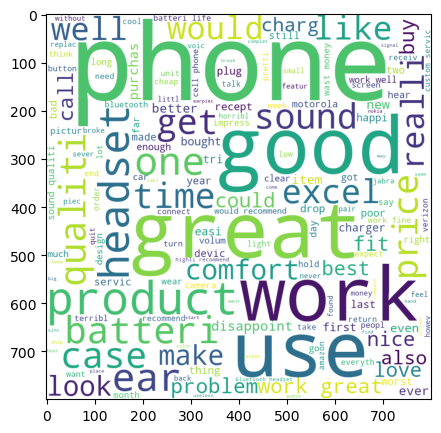

In [15]:
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(all_reviews))

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)


In [30]:
# tfidf = TfidfVectorizer(min_df=3)

# X = tfidf.fit_transform(all_reviews).toarray()
# y = df['sentiment']

# print(f"Shape of X: {X.shape}")
# print(f"Shape of y: {y.shape}")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with bigram option
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=5)

# Transform text data into TF-IDF matrix with bigrams
X = tfidf.fit_transform(all_reviews).toarray()

# Extract target labels
y = df['sentiment']

# Print shape of feature matrix and target vector
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1000, 257)
Shape of y: (1000,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
accuray = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)

print(f"Accuracy: {accuray}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.74
Precision: 0.71
Recall: 0.89
F1 Score: 0.79


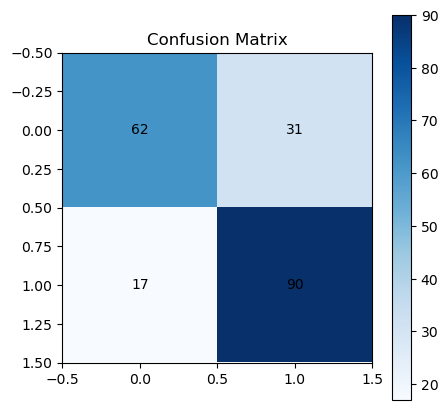

In [8]:
conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
plt.imshow(conf, cmap='Blues')
plt.title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf[i, j], ha='center', va='center', color='black')
plt.colorbar()
plt.show()

In [ ]:
# pipline
feature_engineering_techniques = [
    TfidfVectorizer
]